In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import time

# new import statements


from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
from selenium import webdriver

from IPython.display import display, Image

### Queueing Structures

- Stack:
    - First-In-Last-Out(FILO) or Last-In-First-Out(LIFO)
- Queue:
    - First-In-First-Out (FIFO)
- Priority Queue:
    - Highest priority item is kept first always

<div>
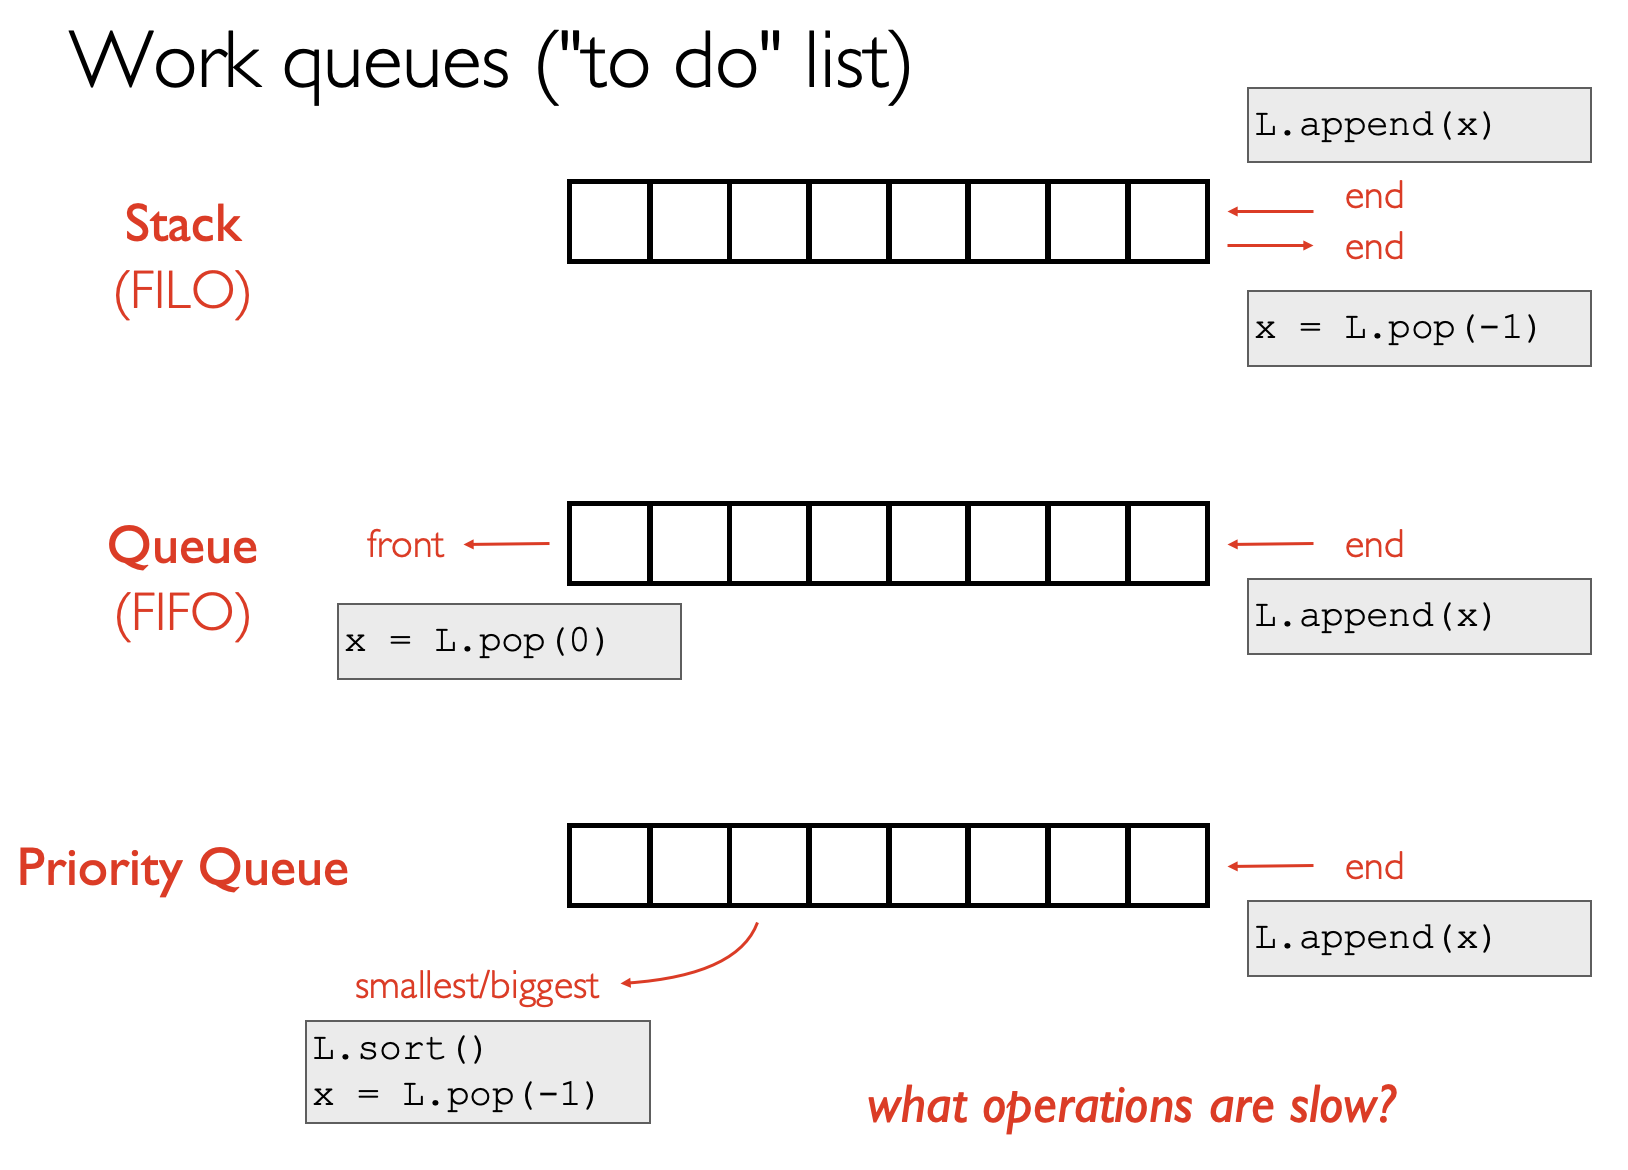
</div>

Slow operations:
- `x = L.pop(0)`
- `L.sort()`

### Using `heapq` (priority queue)

**IMPORTANT**: Unlike `deque`, `heapq` is not a type by itself.

- Operations:
    - `heapq.heappush(LIST, VAL)`:
        - adds VAL to the list
        - shuffles around the values so that the smallest value is in the front
        - does so in **O(log N)** time (so it is not sorting, but just shuffling)
    - `val = heapq.heappop(LIST)`
        - removes the smallest item from the list
        - re-shuffles around the values so that the smallest value is in the front
        - does so in **O(log N)** time (so it is not sorting, but just shuffling)
    - `heapq.heapify(LIST)`
        - shuffles value to move smallest value to the front

In [ ]:
data = []
vals = [5, 3, 1, 4, 2]
for val in vals:
    heapq.heappush(data, val)
data

In [ ]:
while len(data) > 0:
    val = heapq.heappop(data)
    print(val, data)

In [ ]:
data = [5, 3, 1, 4, 2]
heapq.heapify(data)
print(data)

### Benchmarking `stack`, `queue`, and `priority queue` for performance

In [ ]:
iters = 1000

def benchmark_microsec(data, pattern):
    """
    Benchmarking "stack", "queue", "priority queue" 
    implementations using a list data structure
    """
    t0 = time.time()
    for i in range(iters):
        if pattern == "stack":
            data.append(i % 10)
            _ = data.pop(-1)    # O(1)
        elif pattern == "queue":
            data.append(i % 10)
            _ = data.pop(0)     # O(N)
        elif pattern == "prio queue":
            data.append(i % 10)
            data.sort()         # O(N log N)
            _ = data.pop(0)     # O(N) - can be ignored because of sort
        else:
            raise Exception("pattern not supported")
    t1 = time.time()
    return (t1-t0) / iters * 1e6

df = pd.DataFrame()
for N in [1000,2000,5000,10000]:
    df.loc[N,"stack"] = benchmark_microsec([1]*N, "stack")
    df.loc[N,"queue"] = benchmark_microsec([1]*N, "queue")
    #df.loc[N,"prio queue"] = benchmark_microsec([1]*N, "prio queue")

plt.rcParams["font.size"] = 16
df.plot.line(ylim=0)
plt.xlabel("N")
plt.ylabel("Microseconds")
df

In [ ]:
def benchmark_microsec_v2(data, pattern):
    """
    Benchmarking "stack", "queue", "priority queue" 
    implementations using list, deque, and heapq list data structures
    """
    t0 = time.time()
    for i in range(iters):
        if pattern == "stack":
            # still uses list
            data.append(i % 10)
            _ = data.pop(-1)     # O(1)
        elif pattern == "queue":
            # use a deque instead of a list
            data.append(i % 10)
            _ = data.popleft()   # O(1)
        elif pattern == "prio queue":
            # use a heapq instead of a list
            heapq.heappush(data, i % 10) # O(log N)
            _ = heapq.heappop(data)      # O(log N)
            
        else:
            raise Exception("pattern not supported")
    t1 = time.time()
    return (t1-t0) / iters * 1e6

df = pd.DataFrame()
for N in [1000,2000,5000,10000]:
    df.loc[N,"stack"] = benchmark_microsec_v2([1]*N, "stack")
    df.loc[N,"queue"] = benchmark_microsec_v2(deque([1]*N), "queue")
    data = [1]*N
    heapq.heapify(data)
    df.loc[N,"prio queue"] = benchmark_microsec_v2(data, "prio queue")

plt.rcParams["font.size"] = 16
df.plot.line(ylim=0)
plt.xlabel("N")
plt.ylabel("Microseconds")
df

# Web 1: Selenium

- Operations:
    - `b.get(URL)`: sends HTTP GET request to the URL
    - `b.page_source`: HTML source for the page

In [ ]:
options = Options()
options.headless = True # don't use a GUI (necessary on a VM)
service = Service(executable_path="chromium.chromedriver")
b = webdriver.Chrome(options=options, service=service)

### page1.html: Javascript table example

In [ ]:
url = "https://www.msyamkumar.com/cs320/tricky/page1.html"
# TODO: send HTTP GET request to URL


# TODO: display HTML source for the page
print()

### How can we get the 2nd table?

- Run `b.page_source` again
- Selenium obtains the updated DOM tree and converts it back into HTML for us

In [ ]:
print(b.page_source)

### Finding elements

- Operations:
    - `b.get(URL)`: sends HTTP GET request to the URL
    - `b.page_source`: HTML source for the page
    - `b.find_elements("id", <ID>)`: searches for a specific element that matches the "id"
    - `b.find_elements("tag name", <TAG>)`: searches for a specific element using corresponding tag name
    - `b.find_element` versus `b.find_elements`:
        - `find_element` gives first match
        - `find_elements` gives all matches
    - `<element obj>.text`: gives text associated with that element

In [ ]:
# TODO: find first table using id "alpha" (inspect element on browser)
print()

In [ ]:
# TODO: repeat GET request and find all tables using tag "table"
b.get(url)
tbls = 
print(len(tbls))

### POLLING: How would we know when the updated page becomes available?
- keep checking regularly until you get all the details you are looking for.

In [ ]:
b.get(url)

while True:
    tbls = b.find_elements("tag name", "table")
    print("Tables:", len(tbls))
        
    if len(tbls) == 2:
        print(tbls)
        break
    
    time.sleep(0.1) # sleep for 0.1 second

### Let's extract the 2nd table information

In [ ]:
b.find_elements("tag name", "tr") # gives us all tr elements on the webpage

In [ ]:
tbl = None

# TODO: find all tr elements
trs = None

# TODO: find all td elements
# TODO: extract text for all td elements into a list of list
rows = []

for tr in trs:
    tds = None
    assert len(tds) == 2
    print()
    
rows

### Converting `rows` into a `DataFrame`

In [ ]:
pd.DataFrame(rows)

### How can we visually see the page on the VM?

- Operations:
    - `b.save_screenshot("some_file.png")`: saves a screenshot of the rendered page
    - import statement: `from IPython.display import display, Image`: helps us show the screenshot as an image inside the notebook

### Combining taking screenshot and displaying it
- useful for p3

In [ ]:
def show_screen():
    b.save_screenshot("out.png")
    display(Image("out.png"))

### page2.html: "Show More!" button example

- Operations:
    `button_oject.click()`: enables us to click the button

In [ ]:
url = "https://www.msyamkumar.com/cs320/tricky/page2.html"
b.get(url)

In [ ]:
# TODO: find the id for the more button (inspect element on browser)
button = b.find_element("id", "???")

In [ ]:
# TODO: click the button

# keep running this cell reptitively
# once all data is retrieved, we will run into NoSuchElementException

In [ ]:
while True:
    try:
        button = b.find_element("id", "more")
        button.click()
        show_screen()
        print("============================================================")
    except NoSuchElementException:
        print("We have all the data!")
        break
    time.sleep(1)

In [ ]:
print(b.page_source)

### page 3: password protection example

- Operations:
    `text_object.send_keys()`: enables us to send data to textbox

In [ ]:
url = "https://www.msyamkumar.com/cs320/tricky/page3.html"
b.get(url)

In [ ]:
# TODO: find the id for password box (inspect element on browser)
# TODO: find the id for the login button (inspect element on browser)
text = b.find_element("id", "")
button = b.find_element("id", "")

# TODO: send the password (plain text just for example purposes)

show_screen()

# TODO: click the button

show_screen()

In [ ]:
print(b.page_source)

### page 4: search data for a year

- Operations:
    `text_object.clear()`: enables us to clear the previous text

In [ ]:
url = "https://www.msyamkumar.com/cs320/tricky/page4.html"
b.get(url)

In [ ]:
# TODO: find the id for year box (inspect element on browser)
# TODO: find the id for the search button (inspect element on browser)
text = b.find_element("id", "")
button = b.find_element("id", "")

In [ ]:
text.send_keys("1952")
button.click()
show_screen()
# TODO: run this cell twice

#### How many hurricanes were there each year?

In [ ]:
hurricane_counts = pd.Series(dtype=float)

for year in range(1950, 1960):
    text.clear()
    text.send_keys(str(year))
    button.click()
    show_screen()
    
    # TODO: find all tr elements and count hurricanes for each year
    trs = b.find_elements("tag name", "tr")
    
    # TODO: We have to subtract 1 for removing header tr element
    count = len(trs) - 1
    
    hurricane_counts.loc[year] = count
    
# ax = hurricane_counts.plot.line()
# ax.set_xlabel("Year")
# ax.set_ylabel("Hurricane count")